In [1]:
import numpy as np
from matplotlib import cm as cm, pyplot as plt, gridspec as gridspec
from matplotlib.patches import ConnectionPatch
%matplotlib inline

class MatplotlibGridDisplay:
    
    def __init__(self, rows, cols):
        self.rows, self.cols = rows, cols
        self.axes_order = {}
    
    @staticmethod
    def _prepare_axis(ax):
        
        ax.set_xticks([])
        ax.set_yticks([])
        for sp in ax.spines.values():
            sp.set_visible(False)
        if ax.is_first_row():
            ax.spines['top'].set_visible(True)
        if ax.is_last_row():
            ax.spines['bottom'].set_visible(True)
        if ax.is_first_col():
            ax.spines['left'].set_visible(True)
        if ax.is_last_col():
            ax.spines['right'].set_visible(True)
            
        return ax
    
    def _xy_to_rowcol(self, x, y):
        """Converts (x, y) to (row, col).

        """
        return self.rows - y, x - 1

    def _rowcol_to_xy(self, row, col):
        """Converts (row, col) to (x, y).

        """
        return col + 1, self.rows - row
    
    def connect_axes(self, fig, ax1, ax2, order="forward"):
        
        axis_center = (0., 0.)
        if order == "forward":
            con = ConnectionPatch(xyA=axis_center, xyB=axis_center, 
                                  coordsA="data", coordsB="data",
                                  axesA=ax1, axesB=ax2, color="red", 
                                  mutation_scale=40, arrowstyle="->", 
                                  shrinkB=5)
            ax1.add_artist(con)
        else:
            con = ConnectionPatch(xyA=axis_center, xyB=axis_center, 
                                  coordsA="data", coordsB="data",
                                  axesA=ax2, axesB=ax1, color="red", 
                                  mutation_scale=40, arrowstyle="<-",
                                  shrinkB=5)
            ax2.add_artist(con)
            
        ax1.plot(*axis_center,'ro',markersize=10)
        ax2.plot(*axis_center,'ro',markersize=10)
        
    def add_trajectory(self, fig, axes_grid, traj):
                
        x_list, y_list = tuple(zip(*traj)) # [(x, y), ..] -> [x, ...], [y, ...]
        for idx in range(len(x_list)-1):
            ax1 = axes_grid[(x_list[idx], y_list[idx])]
            ax2 = axes_grid[(x_list[idx+1], y_list[idx+1])]
            ax1.set_zorder(-2*idx+1)
            ax2.set_zorder(-2*idx)
            self.connect_axes(fig, ax1, ax2)
            
    def add_trajectories(self, fig, axes_grid, traj_lst):
        
        if traj_lst is not None:
            for traj in traj_lst:
                self.add_trajectory(fig, axes_grid, traj)
                
    def render(self, data, phi_shape, traj_lst=None,
               interpolation="None", cmap=cm.viridis, vmin=None, vmax=None):
        
        H, W, D = data.shape
        # Setup axes grid
        fig = plt.figure(figsize=(W*2, H*2))
        gs = gridspec.GridSpec(H, W)
        gs.update(wspace=0., hspace=0., left = 0., right = 1., bottom = 0., top = 1.)
        axes_grid = {}
        
        for row in range(H):
            for col in range(W):
                ax = plt.Subplot(fig, gs[row, col])
                ax.imshow(data[row, col].reshape(*phi_shape), vmin=vmin, vmax=vmax)
                fig.add_subplot(self._prepare_axis(ax))
                axes_grid[self._rowcol_to_xy(row, col)] = ax
                                
        self.add_trajectories(fig, axes_grid, traj_lst)
        return fig, ax

(<Figure size 288x288 with 4 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x113c27a20>)

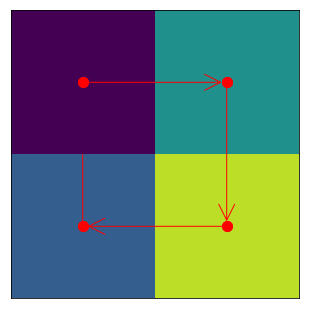

In [2]:
m = MatplotlibGridDisplay(2, 2)
m.render(
    data = np.array([[0., 0.5], [0.3, 0.9]])[:,:,np.newaxis],
    phi_shape=(1,1), traj_lst=[[(1,1), (1,2), (2,2), (2,1), (1,1)]],
    vmin=0., vmax=1.)